In [38]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy import stats


In [3]:
#Setup Data Files
trends_data = Path("Resources/google-search-trends.csv")

#Read as CSV & convert to DF 
trends_df = pd.read_csv(trends_data)


trends_df

,date,location_key,search_trends_abdominal_obesity,search_trends_abdominal_pain,search_trends_acne,search_trends_actinic_keratosis,search_trends_acute_bronchitis,search_trends_adrenal_crisis,search_trends_ageusia,search_trends_alcoholism,...,search_trends_visual_acuity,search_trends_vomiting,search_trends_wart,search_trends_water_retention,search_trends_weakness,search_trends_weight_gain,search_trends_wheeze,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn
0,2020-01-01,AU,3.56,5.38,10.76,0.52,0.35,0.12,0.05,5.36,...,0.70,4.23,1.87,0.39,0.47,4.47,0.30,3.52,0.43,0.21
1,2020-01-02,AU,3.46,5.35,11.30,0.55,0.36,0.14,0.06,4.62,...,0.44,3.97,1.97,0.41,0.47,4.60,0.27,3.48,0.45,0.19
2,2020-01-03,AU,3.40,5.35,11.23,0.53,0.34,0.12,0.05,4.63,...,0.29,3.90,1.85,0.40,0.65,4.46,0.30,3.58,0.39,0.18
3,2020-01-04,AU,3.43,5.23,10.68,0.42,0.35,0.11,0.05,4.82,...,0.28,3.88,1.78,0.38,0.54,4.43,0.30,3.59,0.40,0.21
4,2020-01-05,AU,3.29,5.14,10.20,0.49,0.38,0.11,NaN,4.26,...,0.38,3.73,1.75,0.34,0.46,4.59,0.34,3.09,0.40,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713924,2022-09-04,US_WY_56045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2713925,2022-09-05,US_WY_56045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2713926,2022-09-06,US_WY_56045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2713927,2022-09-08,US_WY_56045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#filter by US only
trends_df_us = trends_df.loc[trends_df['location_key'] == "US"]

trends_df_us

,date,location_key,search_trends_abdominal_obesity,search_trends_abdominal_pain,search_trends_acne,search_trends_actinic_keratosis,search_trends_acute_bronchitis,search_trends_adrenal_crisis,search_trends_ageusia,search_trends_alcoholism,...,search_trends_visual_acuity,search_trends_vomiting,search_trends_wart,search_trends_water_retention,search_trends_weakness,search_trends_weight_gain,search_trends_wheeze,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn
12818,2020-01-01,US,2.42,4.71,8.63,0.26,0.83,0.09,0.05,5.78,...,0.47,4.00,1.23,0.23,0.32,3.13,0.34,2.65,0.36,0.17
12819,2020-01-02,US,2.40,4.66,9.16,0.31,0.93,0.09,0.05,4.80,...,0.33,3.46,1.33,0.25,0.37,3.36,0.33,2.60,0.39,0.16
12820,2020-01-03,US,2.13,4.54,8.75,0.29,0.91,0.10,0.05,4.51,...,0.29,3.28,1.29,0.24,0.36,3.17,0.32,2.46,0.38,0.16
12821,2020-01-04,US,2.30,4.60,9.16,0.25,0.86,0.09,0.05,4.54,...,0.24,3.26,1.24,0.24,0.34,3.15,0.31,2.71,0.38,0.17
12822,2020-01-05,US,2.53,4.59,9.31,0.26,0.81,0.09,0.05,4.31,...,0.23,3.22,1.25,0.24,0.34,3.38,0.31,2.81,0.38,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13799,2022-09-08,US,1.59,4.08,6.37,0.38,0.35,0.10,0.05,3.49,...,0.20,2.45,1.24,0.27,0.41,2.73,0.24,1.74,0.37,0.15
13800,2022-09-09,US,1.42,3.97,6.15,0.35,0.34,0.09,0.05,3.79,...,0.19,2.42,1.18,0.24,0.36,2.55,0.23,1.71,0.37,0.15
13801,2022-09-10,US,1.61,4.27,6.85,0.34,0.35,0.10,0.06,4.03,...,0.16,2.66,1.23,0.26,0.34,2.71,0.23,2.07,0.38,0.16
13802,2022-09-11,US,1.78,4.38,7.19,0.34,0.36,0.10,0.06,3.75,...,0.16,2.68,1.26,0.28,0.38,2.84,0.25,2.15,0.38,0.15


In [5]:
#loop through column headers and print their names to find which columns we should sort by 
for col in trends_df_us:
    print(col)

date
location_key
search_trends_abdominal_obesity
search_trends_abdominal_pain
search_trends_acne
search_trends_actinic_keratosis
search_trends_acute_bronchitis
search_trends_adrenal_crisis
search_trends_ageusia
search_trends_alcoholism
search_trends_allergic_conjunctivitis
search_trends_allergy
search_trends_amblyopia
search_trends_amenorrhea
search_trends_amnesia
search_trends_anal_fissure
search_trends_anaphylaxis
search_trends_anemia
search_trends_angina_pectoris
search_trends_angioedema
search_trends_angular_cheilitis
search_trends_anosmia
search_trends_anxiety
search_trends_aphasia
search_trends_aphonia
search_trends_apnea
search_trends_arthralgia
search_trends_arthritis
search_trends_ascites
search_trends_asperger_syndrome
search_trends_asphyxia
search_trends_asthma
search_trends_astigmatism
search_trends_ataxia
search_trends_atheroma
search_trends_attention_deficit_hyperactivity_disorder
search_trends_auditory_hallucination
search_trends_autoimmune_disease
search_trends_avoidan

In [6]:
#relevant terms
#search_trends_shortness_of_breath
#search_trends_cough
#search_trends_chills
#search_trends_fatigue
#search_trends_headache
#search_trends_fever
#search_trends_sore_throat
#search_trends_anosmia (loss of smell)
#search_trends_ageusia (loss of taste)


#separate out individual columns with relevant data
cleaned_trends_df = trends_df_us.filter(["date","location_key","search_trends_shortness_of_breath","search_trends_cough","search_trends_chills","search_trends_fatigue","search_trends_headache","search_trends_fever","search_trends_sore_throat","search_trends_anosmia","search_trends_ageusia"], axis = 1)

cleaned_trends_df.head()

,date,location_key,search_trends_shortness_of_breath,search_trends_cough,search_trends_chills,search_trends_fatigue,search_trends_headache,search_trends_fever,search_trends_sore_throat,search_trends_anosmia,search_trends_ageusia
12818,2020-01-01,US,0.71,9.75,0.42,4.24,4.94,4.62,2.81,0.06,0.05
12819,2020-01-02,US,0.79,10.30,0.41,4.56,4.39,4.74,2.87,0.06,0.05
12820,2020-01-03,US,0.75,10.15,0.40,4.42,4.27,4.68,2.84,0.06,0.05
12821,2020-01-04,US,0.71,9.97,0.40,4.37,4.39,4.69,2.79,0.06,0.05
12822,2020-01-05,US,0.70,9.49,0.40,4.51,4.30,4.60,2.66,0.06,0.05


Text(0, 0.5, 'Search Volume')

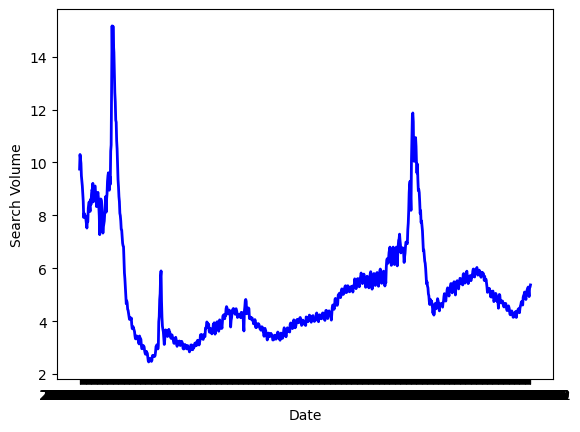

In [7]:
#line graph of of shortness of breath searches by date
date = cleaned_trends_df["date"]
cough = cleaned_trends_df["search_trends_cough"]

#plot graph
plt.plot(date, cough, linewidth =2, color = "blue")
plt.xlabel("Date")
plt.ylabel("Search Volume")



In [8]:
#import hospitalization data

hosp_data = Path("Resources/us.csv")
hosp_df = pd.read_csv(hosp_data)


In [9]:
#calculate daily change in cases 
hosp_df["change_in_cases"] = hosp_df["cases"] - hosp_df["cases"].shift(1)
hosp_df = hosp_df.dropna()
hosp_df

,date,cases,deaths,change_in_cases
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0
5,2020-01-26,5,0,2.0
...,...,...,...,...
1153,2023-03-19,103784916,1133826,1424.0
1154,2023-03-20,103794703,1133964,9787.0
1155,2023-03-21,103813076,1134177,18373.0
1156,2023-03-22,103864888,1134913,51812.0


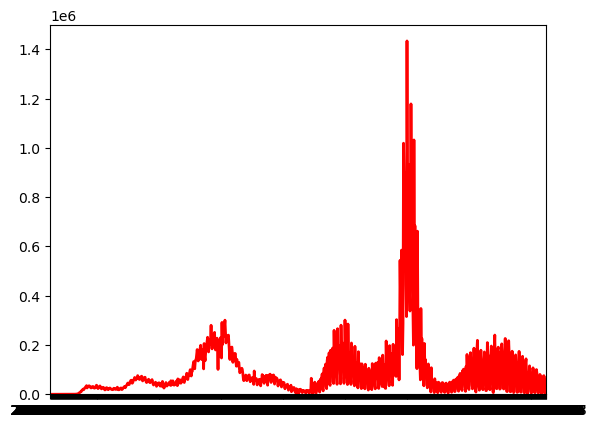

In [10]:
#plot daily change in cases trend

date2=hosp_df["date"]
new_hosp =hosp_df["change_in_cases"]
plt.axis([0,1000,0,1500000])
plt.plot(date2, new_hosp, linewidth=2, color="red")

In [11]:
#merged both cleaned dataframes, only looking at US cases & trends on specific topics
merge_df= pd.merge(hosp_df, cleaned_trends_df, on = "date")
merge_df

,date,cases,deaths,change_in_cases,location_key,search_trends_shortness_of_breath,search_trends_cough,search_trends_chills,search_trends_fatigue,search_trends_headache,search_trends_fever,search_trends_sore_throat,search_trends_anosmia,search_trends_ageusia
0,2020-01-22,1,0,0.0,US,0.73,8.51,0.41,4.78,6.38,5.02,2.45,0.06,0.04
1,2020-01-23,1,0,0.0,US,0.74,8.33,0.41,4.74,4.64,4.91,2.41,0.06,0.04
2,2020-01-24,2,0,1.0,US,0.70,8.15,0.38,4.27,4.26,4.72,2.33,0.05,0.04
3,2020-01-25,3,0,1.0,US,0.69,8.60,0.40,4.41,4.54,5.06,2.47,0.06,0.05
4,2020-01-26,5,0,2.0,US,0.71,8.41,0.41,4.28,4.33,5.16,2.40,0.05,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2022-09-08,94921915,1045586,88425.0,US,0.68,5.09,0.23,4.28,3.78,3.61,2.14,0.08,0.05
961,2022-09-09,94995800,1046119,73885.0,US,0.64,4.93,0.24,3.95,3.65,3.58,2.10,0.07,0.05
962,2022-09-10,94999027,1046145,3227.0,US,0.61,5.26,0.24,3.95,3.98,3.54,2.20,0.08,0.06
963,2022-09-11,95010491,1046164,11464.0,US,0.65,5.29,0.23,4.07,3.89,3.60,2.18,0.08,0.06


The correlation between both factors is -0.02


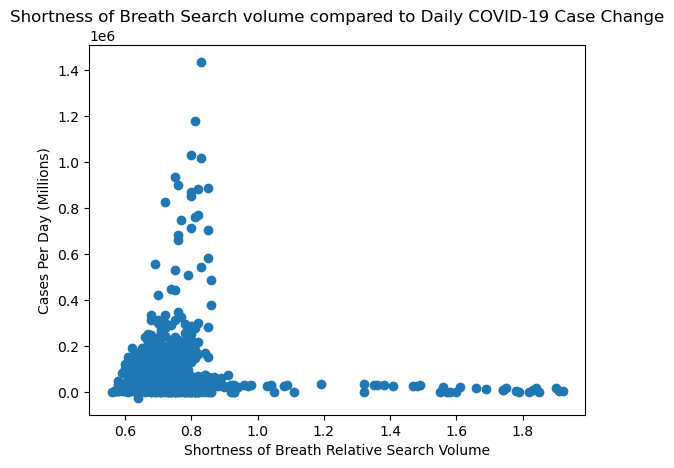

In [29]:
#correlations between shortness of breath and daily cases 
daily_cases = merge_df.iloc[:,3]
shortness = merge_df.iloc[:,5]
correlation = st.pearsonr(shortness,daily_cases)
plt.scatter(shortness,daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Shortness of Breath Relative Search Volume")
plt.title("Shortness of Breath Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.24


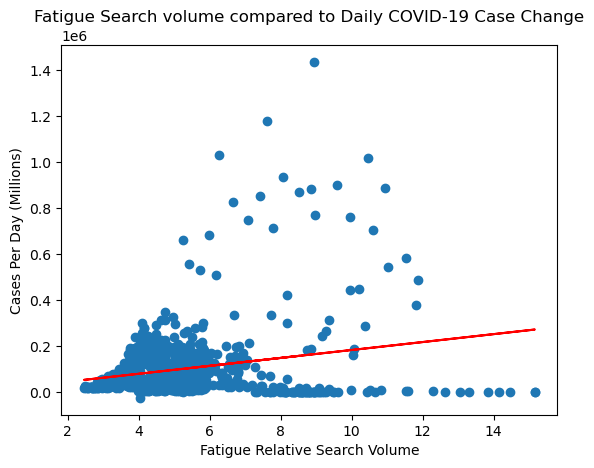

In [58]:
#Daily cases vs fatigue
daily_cases = merge_df.iloc[:,3]
fatigue = merge_df.iloc[:,6]
correlation = st.pearsonr(fatigue, daily_cases)
plt.scatter(fatigue, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Fatigue Relative Search Volume")
plt.title("Fatigue Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

#since this has the second strongest correltation, see if there is a linear regression line that fits well
(slope,intercept,rvalue,pvalue,stderr) = stats.linregress(fatigue, daily_cases)
regress_values = fatigue * slope + intercept
plt.plot(fatigue,regress_values,"r-")

#save figure
plt.savefig("outputs/FatigueCorrelation.png")

#show plot
plt.show()

The correlation between both factors is 0.23


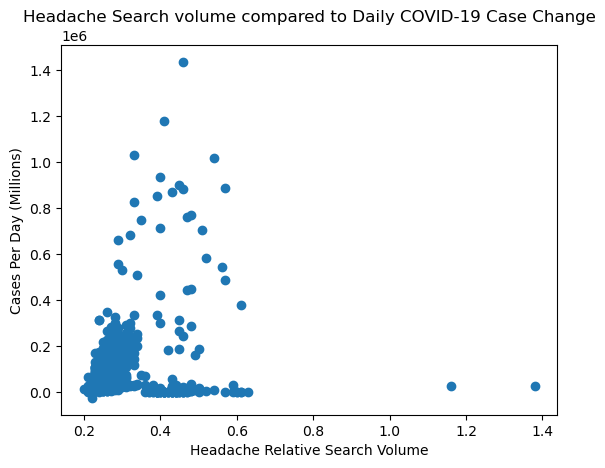

In [31]:
#daily cases vs headache
daily_cases = merge_df.iloc[:,3]
headache = merge_df.iloc[:,7]
correlation = st.pearsonr(headache, daily_cases)
plt.scatter(headache, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Headache Relative Search Volume")
plt.title("Headache Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.12


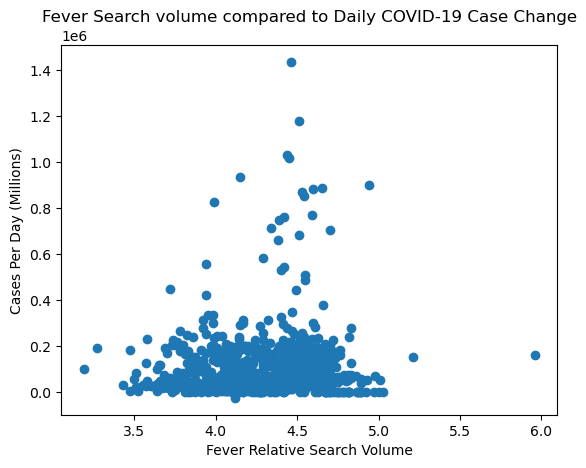

In [32]:
# daily cases vs fever
daily_cases = merge_df.iloc[:,3]
fever = merge_df.iloc[:,8]
correlation = st.pearsonr(fever,daily_cases)
plt.scatter(fever,daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Fever Relative Search Volume")
plt.title("Fever Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.21


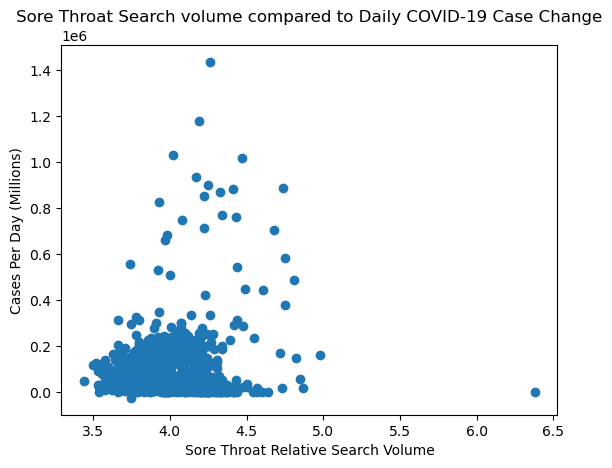

In [33]:
# daily cases vs sore_throat
daily_cases = merge_df.iloc[:,3]
sore_throat = merge_df.iloc[:,9]
correlation = st.pearsonr(sore_throat, daily_cases)
plt.scatter(sore_throat, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Sore Throat Relative Search Volume")
plt.title("Sore Throat Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.1


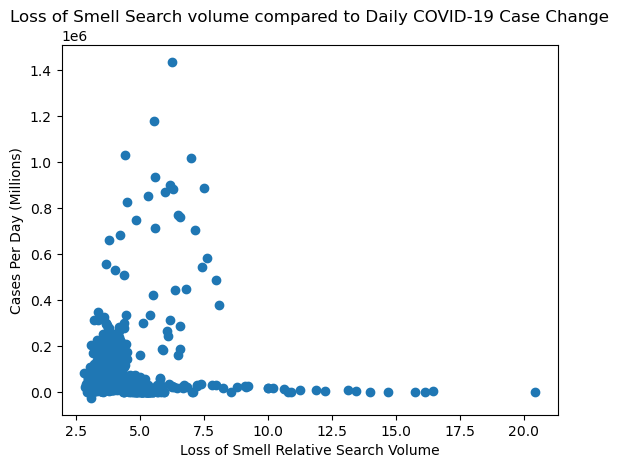

In [34]:
# daily cases vs anosmia (no sense of smell)
daily_cases = merge_df.iloc[:,3]
smell = merge_df.iloc[:,10]
correlation = st.pearsonr(smell, daily_cases)
plt.scatter(smell, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Loss of Smell Relative Search Volume")
plt.title("Loss of Smell Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.29


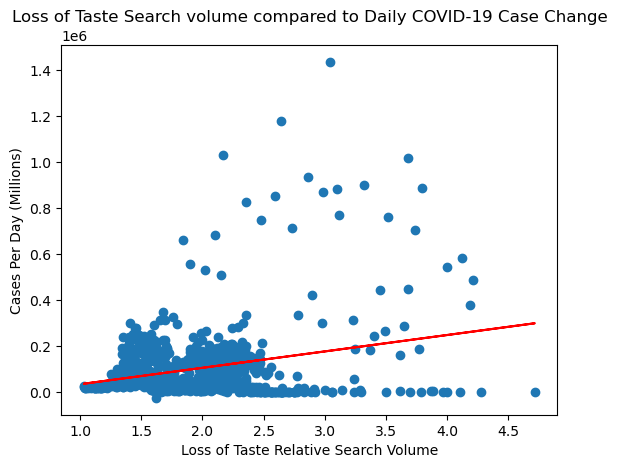

In [59]:
# daily cases vs anosmia (no sense of taste)
daily_cases = merge_df.iloc[:,3]
taste = merge_df.iloc[:,11]
correlation = st.pearsonr(taste, daily_cases)
plt.scatter(taste, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Loss of Taste Relative Search Volume")
plt.title("Loss of Taste Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

#since this has the strongest correltation, see if there is a linear regression line that fits well
(slope,intercept,rvalue,pvalue,stderr) = stats.linregress(taste, daily_cases)
regress_values = taste * slope + intercept
plt.plot(taste,regress_values,"r-")

#save figure
plt.savefig("outputs/LossofTasteCorrelation.png")

#show figure
plt.show()

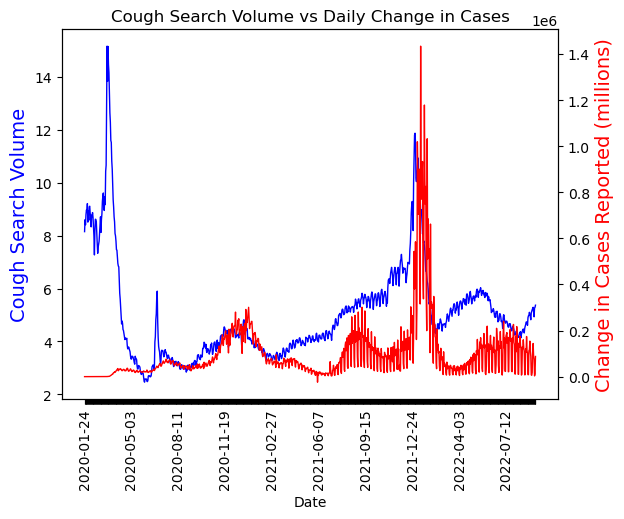

In [103]:
#x and y values
date = merge_df["date"]
cough = merge_df["search_trends_cough"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, cough, linewidth = 1, color = "blue")

#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar

n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Cough Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Cough Search Volume vs Daily Change in Cases")
plt.show()

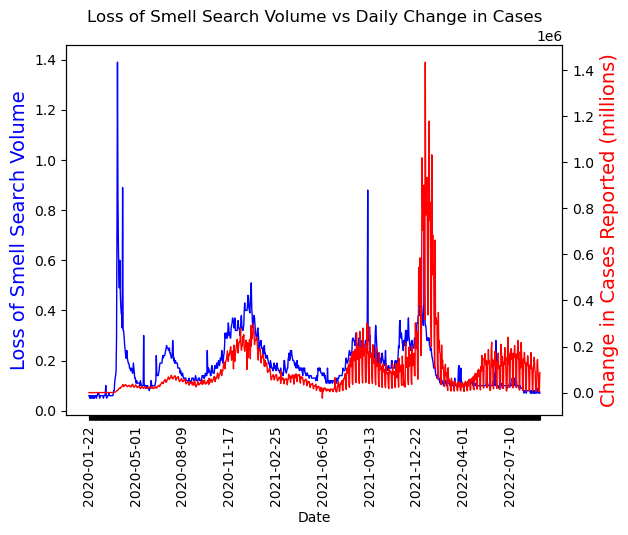

In [56]:
#x and y values
date = merge_df["date"]
smell = merge_df["search_trends_anosmia"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, smell, linewidth = 1, color = "blue")

#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Loss of Smell Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Loss of Smell Search Volume vs Daily Change in Cases")

#save figure
plt.savefig("outputs/LossofSmellvCases.png")

#show figure
plt.show()

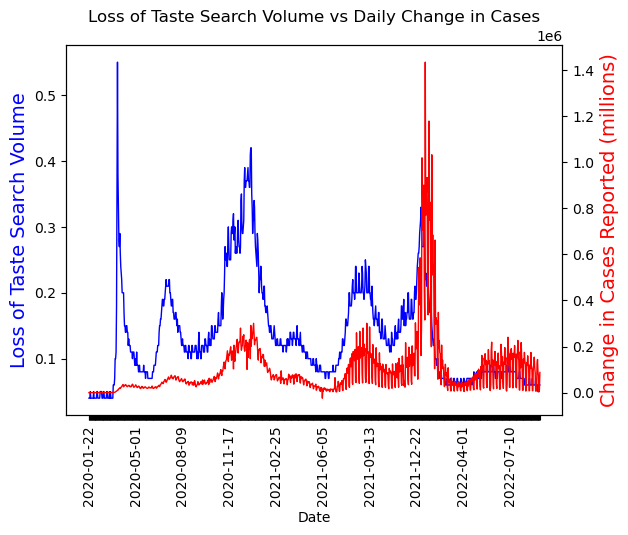

In [51]:
#x and y values
date = merge_df["date"]
taste = merge_df["search_trends_ageusia"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, taste, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Loss of Taste Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Loss of Taste Search Volume vs Daily Change in Cases")

#save figure
plt.savefig("outputs/LossofTastevCases.png")

#show
plt.show()

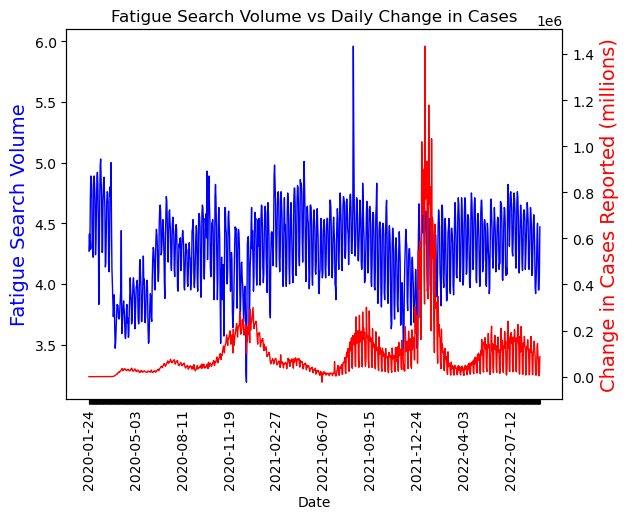

In [109]:
#x and y values
date = merge_df["date"]
fatigue = merge_df["search_trends_fatigue"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, fatigue, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Fatigue Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Fatigue Search Volume vs Daily Change in Cases")
plt.show()

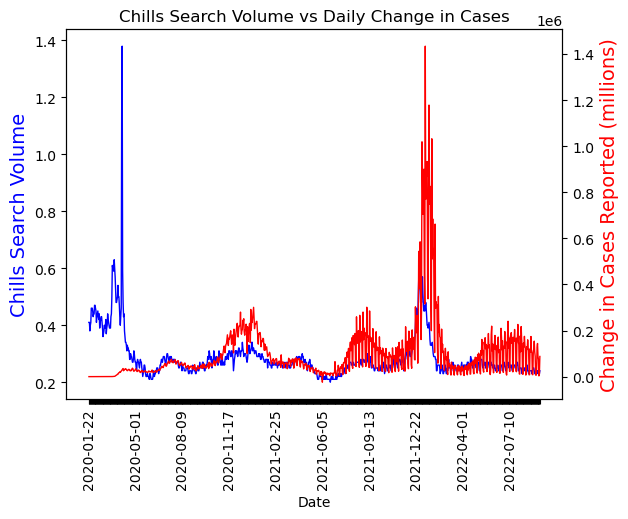

In [142]:
#x and y values
date = merge_df["date"]
chills = merge_df["search_trends_chills"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, chills, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Chills Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Chills Search Volume vs Daily Change in Cases")
plt.show()

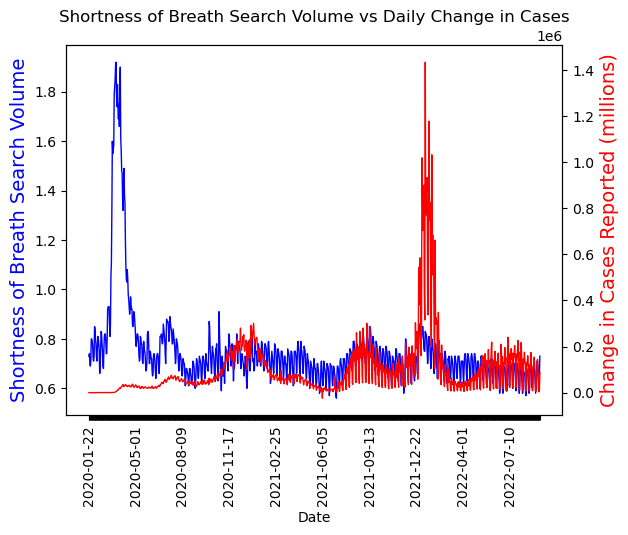

In [143]:
#x and y values
date = merge_df["date"]
shortness = merge_df["search_trends_shortness_of_breath"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, shortness, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Shortness of Breath Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Shortness of Breath Search Volume vs Daily Change in Cases")
plt.show()

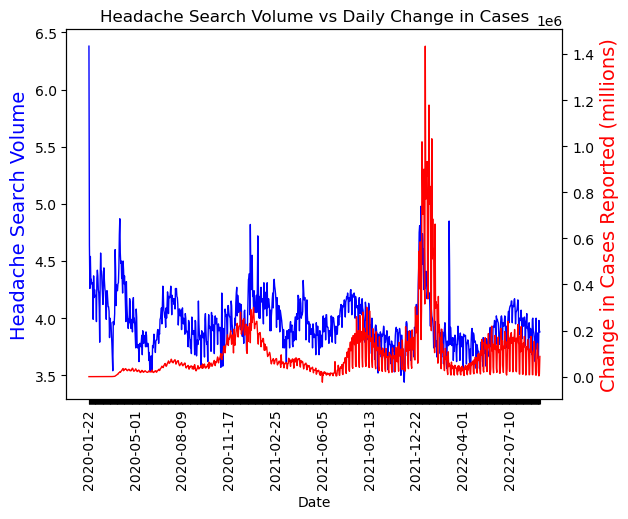

In [144]:
#x and y values
date = merge_df["date"]
headache = merge_df["search_trends_headache"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, headache, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Headache Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Headache Search Volume vs Daily Change in Cases")
plt.show()

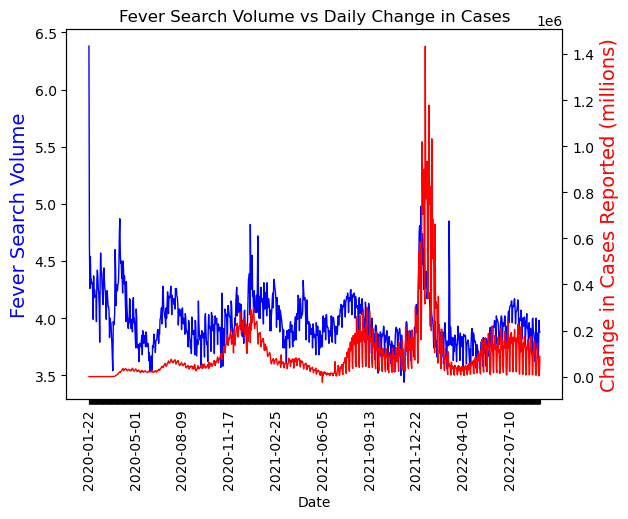

In [145]:
#x and y values
date = merge_df["date"]
fever = merge_df["search_trends_fever"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, headache, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Fever Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Fever Search Volume vs Daily Change in Cases")
plt.show()

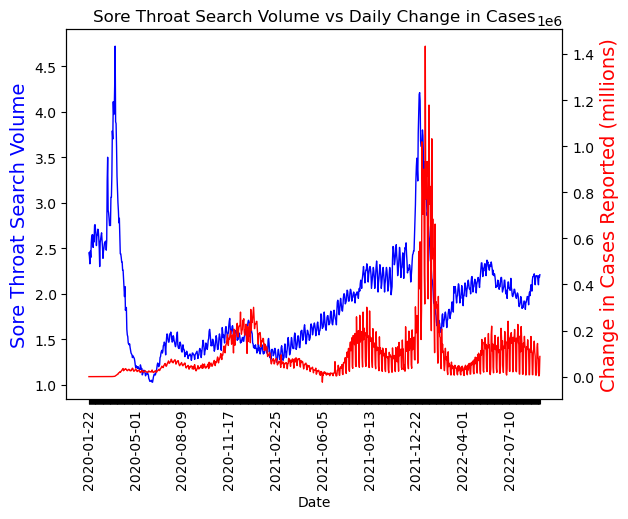

In [49]:
#x and y values
date = merge_df["date"]
sore_throat = merge_df["search_trends_sore_throat"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, sore_throat, linewidth = 1, color = "blue")



#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Sore Throat Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Sore Throat Search Volume vs Daily Change in Cases")

#save figure to outputs file
plt.savefig("outputs/SoreThroatvCases.png")

#show fig
plt.show()
